# Breve descripción

En este cuaderno se tranforma el tipo de datos de algunas columnas como las fechas para la realización de filtros. Las columnas no se renombran pues tienen un nombre por ahora conveniente. 

Algunas agregaciones, como los mínimos y máximos de todo el DataFrame se calcular con el fin de tener referencia al realizar los reordenamientos y finalmente se llegan a algunas conclusiones.

In [1]:
import pandas as pd # Para operar con DataFrames

In [2]:
# Importar los datos sin NaNs ni columnas innecesarias
df_tops_per_year = pd.read_csv("Datasets/data_delimited.csv",index_col = 0)

In [3]:
"""
Diccionario de las columnas que necesitan ser convertidas
y el tipo al que necesitan ser convertidas
"""
diccionario_de_conversion = {
    'added_at': 'datetime64[ns]',
    "track.album.release_date":'datetime64[ns]'
}

In [4]:
# Conversión de la columans antes mencionadas
df_tops_per_year = df_tops_per_year.astype(diccionario_de_conversion)

# Mínimos y máximos

Mínimos

- Como el mínimo en la fecha en que se agrego una canción es del 2020, quiere decir que las canciones se actualizan recurrentemente o algo similar
- A pesar de que se tienen canciones a partir del 2000 la canción más vieja es de 1998
- Hay albumes que sólo tienen una canción
- La mínima duración de una canción es de apróximadamente 1.883 min
- Existe al menos una canción que no tiene parte instrumental

Máximos

- La canción más larga es de apróximadamente 11.47 min
- Ninguna canción llega al 100% de energía, popularidad, danzabilidad o valencia
- Ninguna canción es 100% instrumental, acústica y el máximo de _speechness_ es de 53%

In [5]:
# Mínimos y máximos valores de cada columna
df_min_and_max = pd.DataFrame()
df_min_and_max['minumums'] = df_tops_per_year.min()
df_min_and_max['maximums'] = df_tops_per_year.max()

# Descomentar para observar el DataFrame
# df_min_and_max

# Duración

Por lo siguiente se puede notar que la mayoria de las canciones duran entre 3.5 y 4 minutos

In [6]:
# Canciones que duran más del 4 min
larger_than_4_min = df_tops_per_year[df_tops_per_year["track.duration_ms"] > 240000]

# Canciones que duran menos de 2 min
shorter_than_3_point_5_min = df_tops_per_year[df_tops_per_year["track.duration_ms"] < 210000]

In [7]:
print("Número de canciones «largas»: ",larger_than_4_min.shape[0])
print("Número de canciones «cortas»: ",shorter_than_3_point_5_min.shape[0])
print("Número de canciones «total»: ",df_tops_per_year.shape[0])

Número de canciones «largas»:  636
Número de canciones «cortas»:  661
Número de canciones «total»:  2050


# Explicitud

In [8]:
# Canciones explícitas
explicit_songs = df_tops_per_year[df_tops_per_year['track.explicit']]
not_explicit_songs = df_tops_per_year[~df_tops_per_year['track.explicit']]

In [9]:
# Se seleccionan unas cuantas columnas para un major enfoque
columns_for_explicity = ['track.duration_ms',
                         'track.popularity',
                         'danceability',
                         'energy',
                         'key',
                         'loudness',
                         'mode',
                         'speechiness',
                         'acousticness',
                         'instrumentalness',
                         'liveness',
                         'valence',
                         'tempo',
                         'time_signature']

In [10]:
means_explicity = pd.DataFrame()
means_explicity['explicit'] = explicit_songs[columns_for_explicity].mean()
means_explicity['not_explicit'] = not_explicit_songs[columns_for_explicity].mean()

# Descomentar para ver el dataframe
# means_explicity

Pocas cosas son diferentes entre las canciones que son explícitas y las que no lo son. La parte del «habla» (*speechiness*) y la instrumental son las que más se diferencian, puede ser porque aquellas que son más explicitas necesitan hacer más uso de las palabras y dejar en segundo plano la parte instrumental.

In [11]:
# Para visualizarlo mejor
import seaborn as sns

In [12]:
sns.set_style("darkgrid")

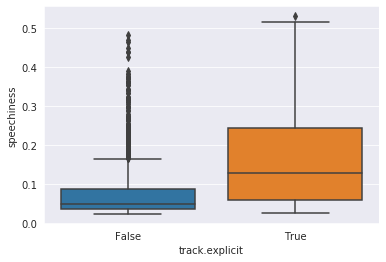

In [13]:
sns.boxplot(x = 'track.explicit', y = 'speechiness', data = df_tops_per_year)

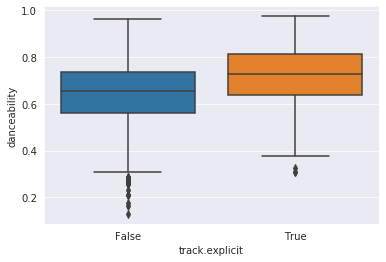

In [14]:
sns.boxplot(x = 'track.explicit', y = 'danceability', data = df_tops_per_year)